In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import font_manager, rc
import platform
import matplotlib.patches as patches
warnings.filterwarnings( 'ignore' )


#### 변수 설명
###### 1. Attrition_Flag : 계정이 폐쇄된 경우, 아닌경우
###### 2. Customer_Age : 고객 나이
###### 3. Gender : 성별
###### 4. Dependent_count : 부양가족 수
###### 5. Education_Level : 교육 수준 (고등학교, 대졸 등)
###### 6. Marital_Status : 결혼 상태(기혼,미혼,이혼,불명)
###### 7. Income_Category : 소득 범주 (범위)
###### 8. Card_Category : 카드 유형(블루, 실버, 골드, 플래티넘)
###### 9. Months_on_book : 은행과의 관계기간(월기준?)
###### 10. Total_Relationship_Count : 고객이 보유한 제품의 총수
###### 11. Months_Inactive_12_mon : 지난 12개월 동안 비활성 개월 수
###### 12. Contacts_Count_12_mon : 지난 12개월 동안의 연락처 수
###### 13. Credit_Limit : 신용카드 한도
###### 14. Total_Revolving_Bal : 신용카드의 총 회전잔액
###### 15. Avg_Open_To_Buy : 신용 한도 구매 가능(최근 12개월 평균)
###### 16. Total_Amt_Chng_Q4_Q1 : 거래 금액 변경(Q1 대비 Q4)
###### 17. Total_Trans_Amt : 총 거래 금액(지난 12개월)
###### 18. Total_Trans_Ct : 총 거래 건수(지난 12개월)
###### 19. Total_Ct_Chng_Q4_Q1: 거래 수의 변화(Q1 대비 Q4)
###### 20. Avg_Utilization_Ratio : 평균 카드 이용률

In [100]:
data = pd.read_csv('./이탈고객예측/datasets/BankChurners.csv')
data.columns
data = data.iloc[:,1:21]

In [101]:
data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

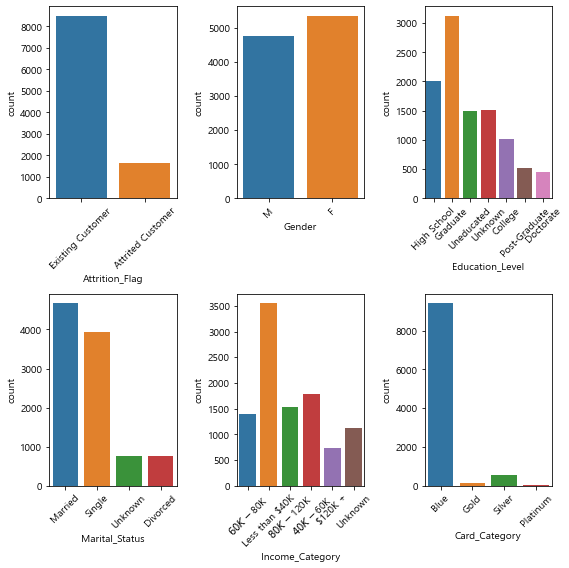

In [103]:
def object_countplot(data, nrow, ncol):
    lists = data.columns
    object_list = []
    for list in lists:
        if (data[list].dtypes == 'O'):
            object_list.append(list)

    plt.figure(figsize=(8,8))

    for list,i in zip(object_list, np.arange(len(object_list))):
        plt.subplot(nrow, ncol, i+1)
        sns.countplot(data[list])
        plt.xticks(rotation=45)
        plt.ylabel("count")
        plt.xlabel(list)
        
    plt.tight_layout()
    plt.show()

object_countplot(data, 2, 3)

## 상관성 

In [104]:
cor = data.corr()
cor

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


## 히트맵으로 상관성 시각화

<AxesSubplot:>

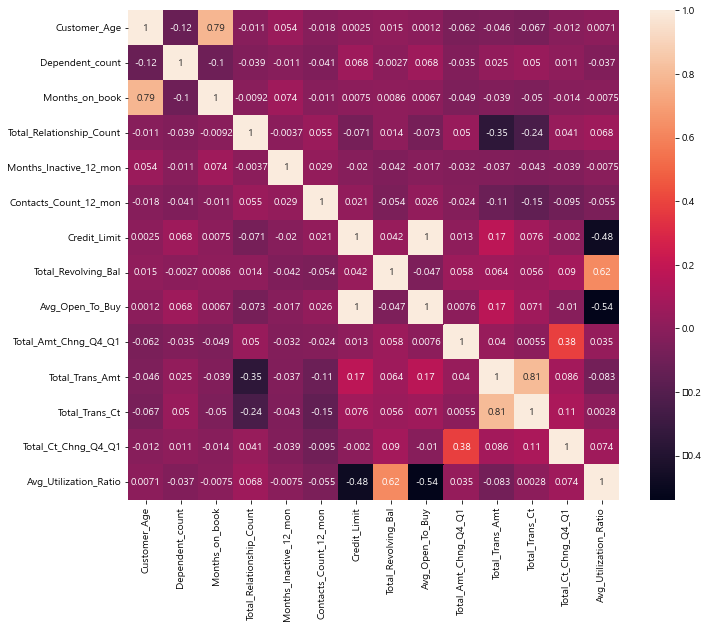

In [105]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor, annot=True)


## 상관성 알아보기 

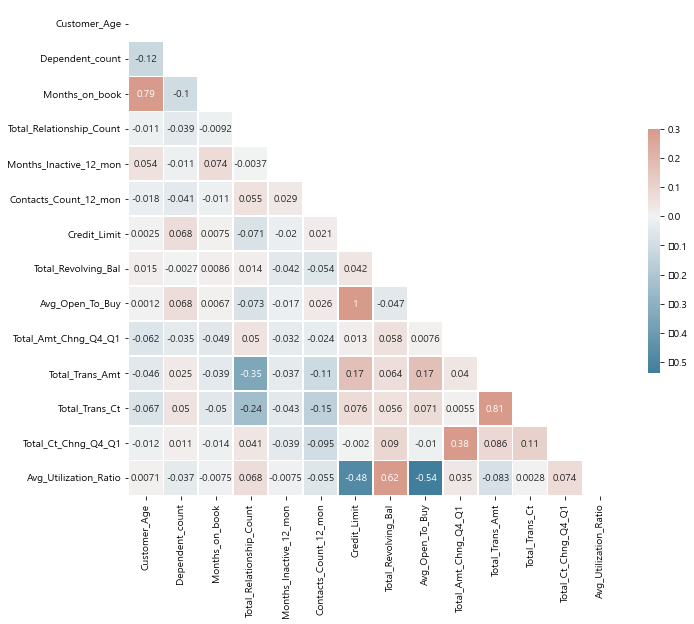

In [106]:
# Generate a mask for the upper triangle

mask = np.triu(np.ones_like(cor))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.yticks(rotation=0)
plt.show()

## 연속형 데이터 이상치 알아보기(박스플롯)

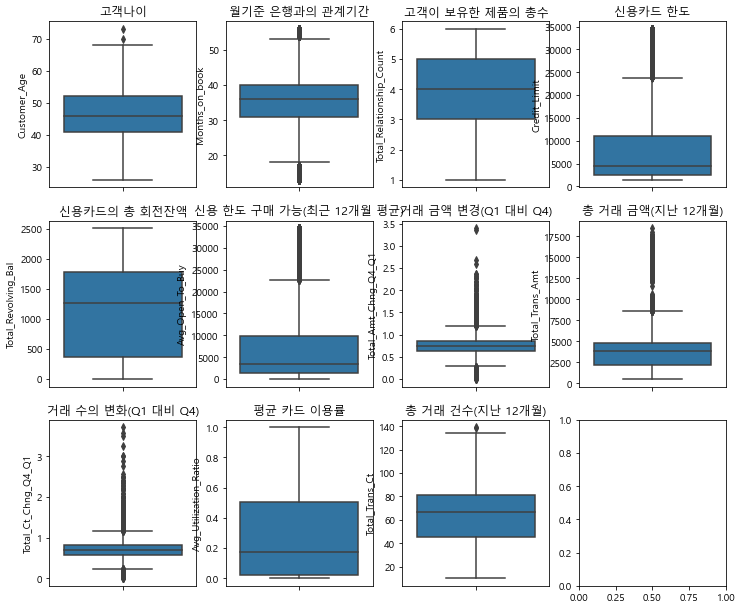

In [107]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


fig , axes = plt.subplots(nrows=3 ,ncols=4,
                          figsize=(10,8) )
plt.subplots_adjust(left=0.05, bottom=0.01, right=0.99, 
                    top=0.99, wspace=None, hspace=0.2)
ax = axes.flatten()

sns.boxplot(y=data['Customer_Age'], data=data , ax = ax[0]) # 고객나이
ax[0].set_title('고객나이')

sns.boxplot(y=data['Months_on_book'], data=data , ax = ax[1]) # 월기준 은행과의 관계기간
ax[1].set_title('월기준 은행과의 관계기간')

sns.boxplot(y=data['Total_Relationship_Count'], data=data , ax = ax[2]) #  고객이 보유한 제품의 총수
ax[2].set_title('고객이 보유한 제품의 총수')

sns.boxplot(y=data['Credit_Limit'], data=data , ax = ax[3]) #신용카드 한도
ax[3].set_title('신용카드 한도')

sns.boxplot(y=data['Total_Revolving_Bal'], data=data , ax = ax[4]) # 신용카드의 총 회전잔액
ax[4].set_title('신용카드의 총 회전잔액')

sns.boxplot(y=data['Avg_Open_To_Buy'], data=data , ax = ax[5]) # 신용 한도 구매 가능(최근 12개월 평균)
ax[5].set_title('신용 한도 구매 가능(최근 12개월 평균)')

sns.boxplot(y=data['Total_Amt_Chng_Q4_Q1'], data=data , ax = ax[6]) #거래 금액 변경(Q1 대비 Q4)
ax[6].set_title('거래 금액 변경(Q1 대비 Q4)')

sns.boxplot(y=data['Total_Trans_Amt'], data=data , ax = ax[7]) # 총 거래 금액(지난 12개월)
ax[7].set_title('총 거래 금액(지난 12개월)')

sns.boxplot(y=data['Total_Ct_Chng_Q4_Q1'], data=data , ax = ax[8]) # 거래 수의 변화(Q1 대비 Q4)
ax[8].set_title('거래 수의 변화(Q1 대비 Q4)')

sns.boxplot(y=data['Avg_Utilization_Ratio'], data=data , ax = ax[9]) #평균 카드 이용률
ax[9].set_title('평균 카드 이용률')

sns.boxplot(y=data['Total_Trans_Ct'], data=data , ax = ax[10]) # 총 거래 건수(지난 12개월)
ax[10].set_title('총 거래 건수(지난 12개월)')

plt.show()


Text(0.5, 1.0, ' 총 거래 건수(지난 12개월)')

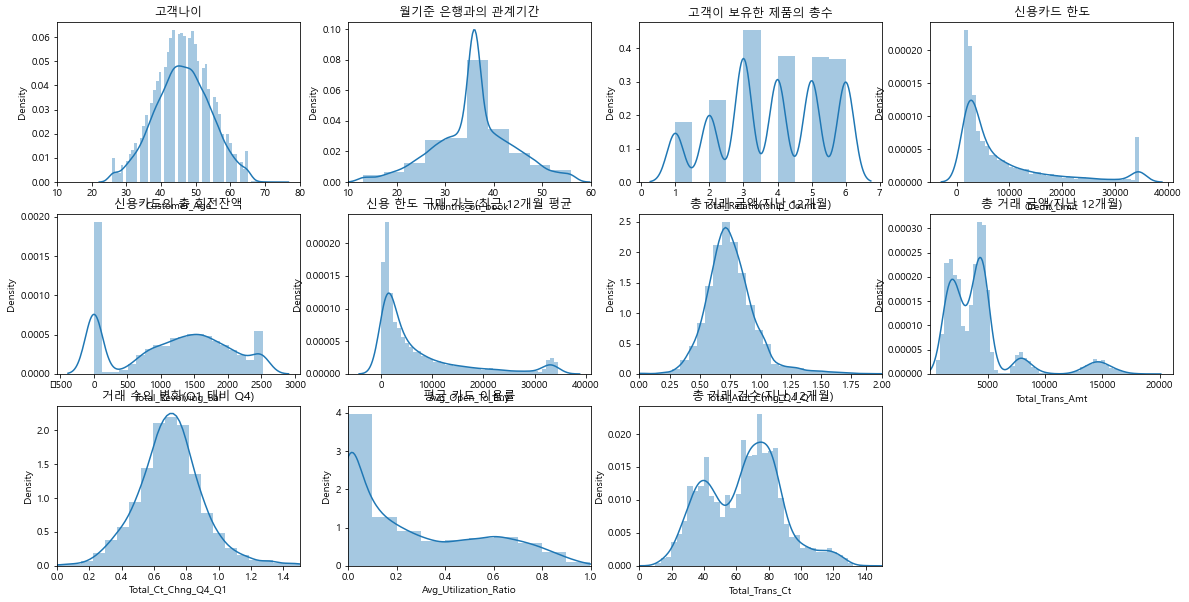

In [108]:
plt.figure(figsize=(20,10))

plt.subplot(3,4,1)
sns.distplot(data['Customer_Age'],bins=60)
plt.xlim(10,80)
plt.title('고객나이')

plt.subplot(3,4,2)
sns.distplot(data['Months_on_book'],bins=10)
plt.xlim(10,60)
plt.title('월기준 은행과의 관계기간')

plt.subplot(3,4,3)
sns.distplot(data['Total_Relationship_Count'],bins=10)
plt.xlim()
plt.title('고객이 보유한 제품의 총수')

plt.subplot(3,4,4)
sns.distplot(data['Credit_Limit'])
plt.xlim()
plt.title('신용카드 한도')

plt.subplot(3,4,5)
sns.distplot(data['Total_Revolving_Bal'])
plt.xlim()
plt.title('신용카드의 총 회전잔액')

plt.subplot(3,4,6)
sns.distplot(data['Avg_Open_To_Buy'])
plt.xlim()
plt.title('신용 한도 구매 가능(최근 12개월 평균')

plt.subplot(3,4,7)
sns.distplot(data['Total_Amt_Chng_Q4_Q1'])
plt.xlim(0,2.0)
plt.title('총 거래 금액(지난 12개월)')

plt.subplot(3,4,8)
sns.distplot(data['Total_Trans_Amt'])
plt.xlim(2.5)
plt.title('총 거래 금액(지난 12개월)')

plt.subplot(3,4,9)
sns.distplot(data['Total_Ct_Chng_Q4_Q1'])
plt.xlim(0,1.5)
plt.title('거래 수의 변화(Q1 대비 Q4)')

plt.subplot(3,4,10)
sns.distplot(data['Avg_Utilization_Ratio'],bins=10)
plt.xlim(0,1)
plt.title('평균 카드 이용률')

plt.subplot(3,4,11)
sns.distplot(data['Total_Trans_Ct'])
plt.xlim(0,150)
plt.title(' 총 거래 건수(지난 12개월)')

1. Attrition_Flag 계정이 폐쇄된 경우, 아닌경우
2. Gender  성별
3. Education_Level  교육 수준 (고등학교, 대졸 )
4. Marital_Status  결혼 상태(기혼,미혼,이혼,불명)
5. Income_Category  소득 범주 (범위)
6. Card_Category  카드 유형(블루, 실버, 골드, 플래티넘)
7. Months_Inactive_12_mon  지난 12개월 동안 비활성 개월 수
8. Contacts_Count_12_mon  지난 12개월 동안의 연락처 수
9. Dependent_count  부양가족 수
10. Total_Relationship_Count  고객이 보유한 제품의 총수



In [109]:
data['Total_Relationship_Count'].value_counts()


3    2305
4    1912
5    1891
6    1866
2    1243
1     910
Name: Total_Relationship_Count, dtype: int64

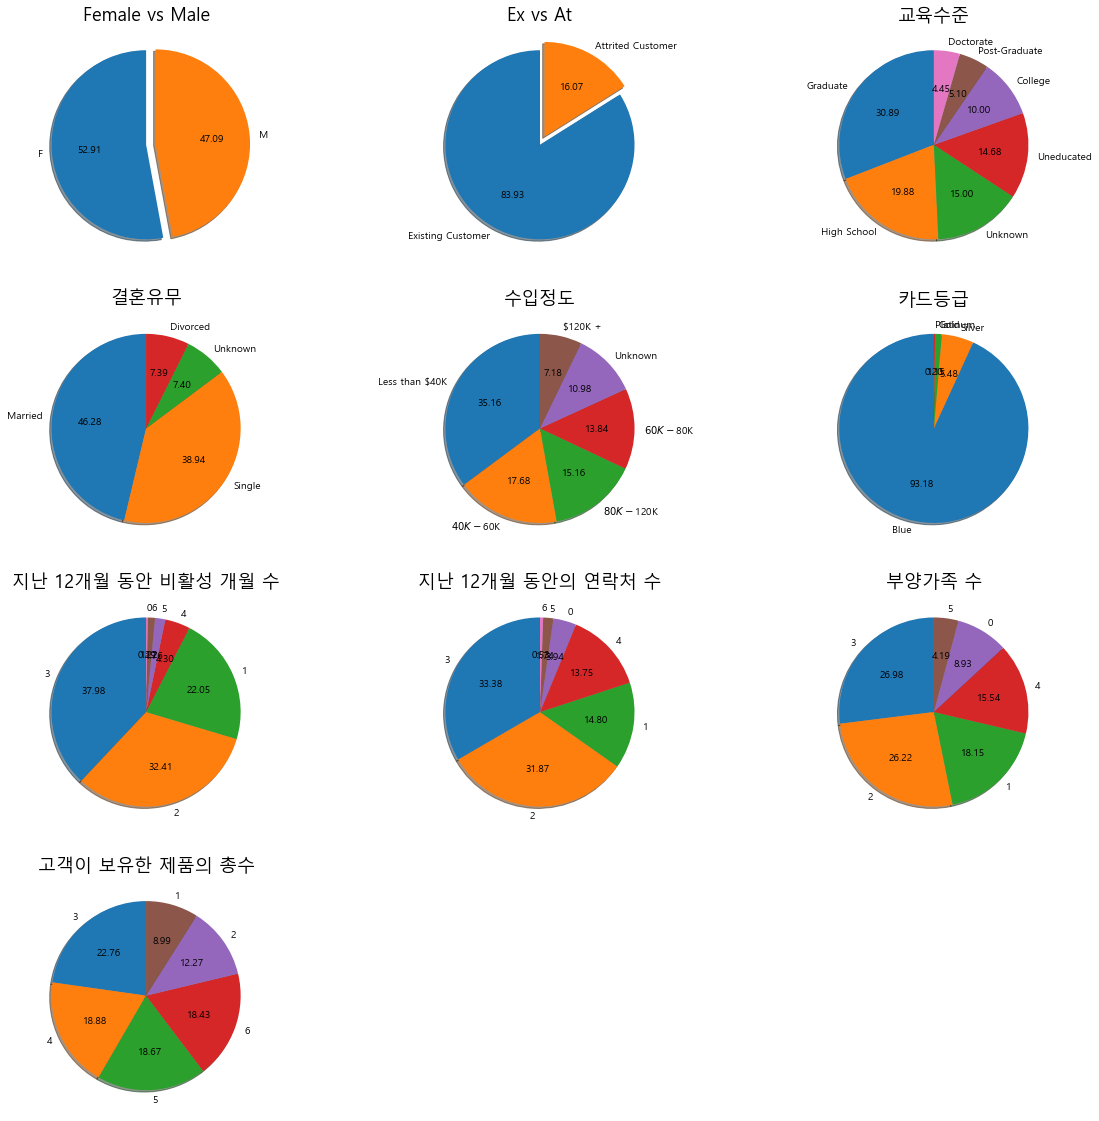

In [110]:
plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
labels = 'F', 'M'
labels
plt.pie(data['Gender'].value_counts(), explode=(0, 0.1), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('Female vs Male', fontsize=18)


plt.subplot(4,3,2)
labels = 'Existing Customer', 'Attrited Customer'
labels
plt.pie(data['Attrition_Flag'].value_counts(), explode=(0, 0.1), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('Ex vs At', fontsize=18)

plt.subplot(4,3,3)
labels = 'Graduate', 'High School','Unknown','Uneducated','College','Post-Graduate','Doctorate'
labels
plt.pie(data['Education_Level'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('교육수준', fontsize=18)


plt.subplot(4,3,4)

labels = 'Married', 'Single','Unknown','Divorced'
labels
plt.pie(data['Marital_Status'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('결혼유무', fontsize=18)

plt.subplot(4,3,5)

labels = 'Less than $40K', '$40K - $60K','$80K - $120K','$60K - $80K','Unknown','$120K +'
labels
plt.pie(data['Income_Category'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('수입정도', fontsize=18)

plt.subplot(4,3,6)
labels = 'Blue', 'Silver','Gold','Platinum' 
labels
plt.pie(data['Card_Category'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('카드등급', fontsize=18)

plt.subplot(4,3,7)
labels = '3','2','1','4','5','6','0'
labels
plt.pie(data['Months_Inactive_12_mon'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('지난 12개월 동안 비활성 개월 수', fontsize=18)

plt.subplot(4,3,8)
labels = '3','2','1','4','0','5','6'
labels
plt.pie(data['Contacts_Count_12_mon'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('지난 12개월 동안의 연락처 수', fontsize=18)

plt.subplot(4,3,9)
labels = '3','2','1','4','0','5'
labels
plt.pie(data['Dependent_count'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('부양가족 수', fontsize=18)

plt.subplot(4,3,10)
labels = '3','4','5','6','2','1'
labels
plt.pie(data['Total_Relationship_Count'].value_counts(), labels=labels, startangle=90, shadow=True, autopct='%.2f')
plt.title('고객이 보유한 제품의 총수', fontsize=18)

plt.show()

In [111]:
from scipy import stats
Credit_Limit = data.Credit_Limit

#독립표본 t-검정
#변수생성
Existing = data[data.Attrition_Flag == "Existing Customer"] #Existing Customer
Attrited = data[data.Attrition_Flag == "Attrited Customer"] #Attrited Customer

#Levene의 등분산 검정 
lresult = stats.levene(Existing.Credit_Limit, Attrited.Credit_Limit)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))

result = stats.ttest_ind(Existing.Credit_Limit, Attrited.Credit_Limit, equal_var=False) #등분산
print('t statistic : %.3f \np-value : %.3f' % (result))

LeveneResult(F) : 1.553 
p-value : 0.213
t statistic : 2.401 
p-value : 0.016


In [112]:
data['Attrition_Flag']

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: object

In [113]:
data_cat=data['Attrition_Flag'].astype('category')
data_cat

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: category
Categories (2, object): ['Attrited Customer', 'Existing Customer']

In [114]:
data_cat.values.categories

Index(['Attrited Customer', 'Existing Customer'], dtype='object')

In [115]:
data_cat.values.codes

array([1, 1, 1, ..., 0, 0, 0], dtype=int8)

In [116]:
data['Attrition_Flag']=data_cat
y=data_cat


In [124]:
feature=data[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal',
             'Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']]

In [125]:
X=feature

In [126]:
y

0        Existing Customer
1        Existing Customer
2        Existing Customer
3        Existing Customer
4        Existing Customer
               ...        
10122    Existing Customer
10123    Attrited Customer
10124    Attrited Customer
10125    Attrited Customer
10126    Attrited Customer
Name: Attrition_Flag, Length: 10127, dtype: category
Categories (2, object): ['Attrited Customer', 'Existing Customer']

In [127]:
from sklearn.model_selection import train_test_split
# Train-Test Separation
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=10101)

In [128]:
models=[]
models.append(('LR',LogisticRegression(random_state=10101)))

In [131]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

# 라벨 인코더 생성
# encoder = LabelEncoder()
# encoder.fit(X_train)
# X_train_encoded = encoder.transform(X_train)

# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(('LR',LogisticRegression()))
classifiers.append(('KNN',RandomForestClassifier()))
classifiers.append(('CART',KNeighborsClassifier()))
classifiers.append(('RF',SVC()))
classifiers.append(('SVM',DecisionTreeClassifier()))

for name,model in classifiers:
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy= accuracy_score(y_test,y_pred)
    msg="%s:(%f)" % (name,accuracy)
    print(msg)

LR:(0.876604)
KNN:(0.958045)
CART:(0.885489)
RF:(0.845508)
SVM:(0.936821)


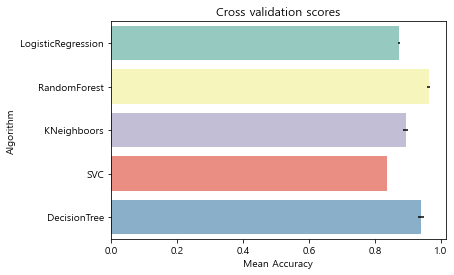

In [133]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","DecisionTree"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")


In [134]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.872979,0.003840,LogisticRegression
1,0.962474,0.003933,RandomForest
2,0.893225,0.007404,KNeighboors
3,0.837798,0.000240,SVC
4,0.940624,0.008944,DecisionTree


In [137]:
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
scoring_metric='recall'

clf_rf = GridSearchCV(RandomForestClassifier(), param_grid = param_grid, scoring = scoring_metric, cv = 5, verbose = False, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train, y_train)
best_clf_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['entropy', 'gini'],
                         'max_depth': [6], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 3, 5],
                         'min_samples_split': [2, 3, 5], 'n_estimators': [50]},
             scoring='recall', verbose=False)

In [138]:
# SVC
SVM = SVC()
param_grid = {
                'C': [0.1, 1, 10], 
                'gamma': [0.01, 0.1, 1],
                'kernel': ['rbf']
}
gs_SVM = GridSearchCV(SVM, param_grid, cv=kfold, n_jobs=4)
gs_SVM.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [145]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 247,   66],
       [  62, 1651]], dtype=int64)